16/16 [==============================] - 1s 5ms/step


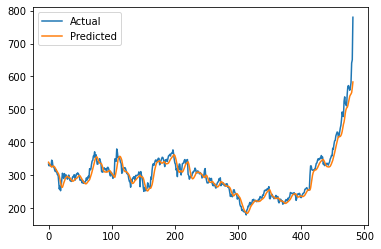

MSE:  415.96688882861616
RMSE:  20.395266333848554
MAE:  13.662639283886518
R^2:  0.9195012446049847


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error
# Load the dataset
#df = pd.read_csv('stock_data.csv')
df = pd.read_csv(r'C:\Users\prona\PycharmProjects\Lasttry\TSLA.csv', names=['Close'], header=0)
# Extract the closing prices
data = df.filter(['Close']).values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
training_data_len = int(np.ceil(len(data) * 0.8))
train_data = scaled_data[0:training_data_len, :]

# Create the training data
x_train = []
y_train = []
prediction_days = 30 # Change this value as needed
for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-prediction_days:i, 0])
    y_train.append(train_data[i, 0])

# Convert the training data to a numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the training data to be 3-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data
test_data = scaled_data[training_data_len - prediction_days:, :]

# Create the x_test and y_test data
x_test = []
y_test = data[training_data_len:, :]
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])

# Convert the testing data to a numpy array
x_test = np.array(x_test)

# Reshape the testing data to be 3-dimensional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions using the model
predicted_values = model.predict(x_test)

# Inverse the scaling
predicted_values = scaler.inverse_transform(predicted_values)

# Calculate the performance metrics
mse = mean_squared_error(y_test, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
plt.plot(y_test, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.legend()
plt.show()
# Print the performance metrics
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R^2: ", r2)





In [13]:
import pandas as pd
import numpy as np

a = np.array(y_test)
b = np.array(predicted_values)

df = pd.DataFrame({"Actual" : a, "Prediction" : b})
df.to_csv("LSTM.csv", index=False)

ValueError: Per-column arrays must each be 1-dimensional

ADF Test = 1
KPSS Test = 1
PP Test = 1


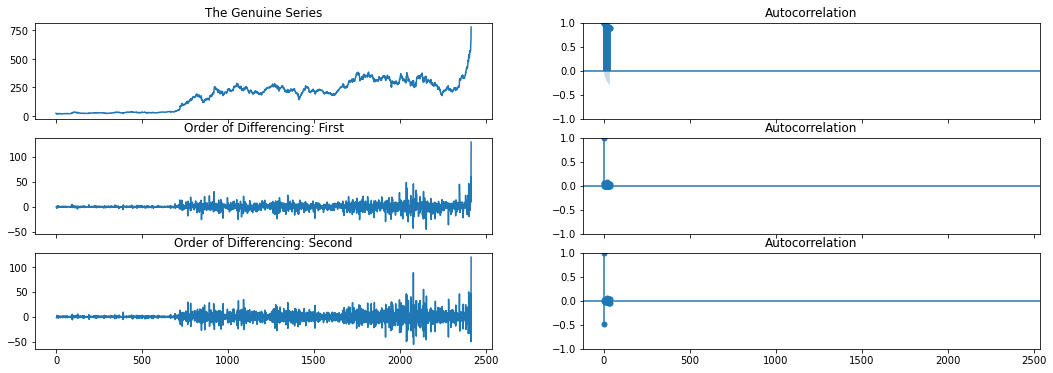

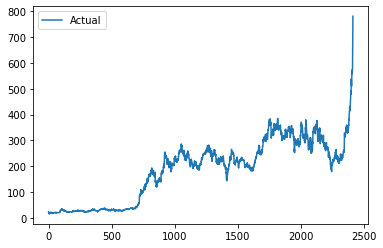

Mean Squared Error (MSE): 49.30763083478763
Root Mean Squared Error (RMSE): 7.021939250291734
MAE:  0.449347001132696
R^2:  0.999961826718178


In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy import log
import pmdarima
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Load data
df = pd.read_csv(r'C:\Users\prona\PycharmProjects\Lasttry\TSLA.csv', names=['Close'], header=0)

# Determine optimal order of differencing
adftest = ndiffs(df.Close, test='adf')
kpsstest = ndiffs(df.Close, test='kpss')
pptest = ndiffs(df.Close, test='pp')
print("ADF Test =", adftest)
print("KPSS Test =", kpsstest)
print("PP Test =", pptest)

# Plot original and differenced data
fig, axes = plt.subplots(3, 2, sharex=True,figsize=(18, 6))
axes[0, 0].plot(df.Close);
axes[0, 0].set_title('The Genuine Series')
plot_acf(df.Close, ax=axes[0, 1])

axes[1, 0].plot(df.Close.diff());
axes[1, 0].set_title('Order of Differencing: First')
plot_acf(df.Close.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df.Close.diff().diff());
axes[2, 0].set_title('Order of Differencing: Second')
plot_acf(df.Close.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

# Fit ARIMA model
mymodel = ARIMA(df.Close, order=(1, 1, 1))
modelfit = mymodel.fit()

# Plot predicted values against actual values
pred = modelfit.predict(start=1, end=len(df.Close), typ='levels')
plt.plot(df.Close, label='Actual')
#plt.plot(pred, label='Predicted')
plt.legend()
plt.show()

mae = mean_absolute_error(df.Close, pred)
r2 = r2_score(df.Close,pred)
# Calculate MSE and RMSE
mse = ((pred - df.Close) ** 2).mean()
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



print("MAE: ", mae)
print("R^2: ", r2)
